__Authors__: Bruno Javier Limon Avila, Carlo Volpe, Chiara Menchetti, Davide Di Virgilio

---

## Introduction

The main focus of our analysis will be on fake news detection regarding the COVID-19 pandemic. The data comes from the following Kaggle dataset: [COVID-19 Fake News Detection](https://www.kaggle.com/datasets/arashnic/covid19-fake-news). There is a collection of 33 files, however not all of them are going to be used. The ones that will be considered are those containing news (which can be actual news from the web or tweets), disregarding those with claims. 

In this initial notebook it will be carried out the data loading and pre-processing of the data, which will result in a clean and complete dataset that will be used in the analysis that will follow.

## Data Loading

The first task is to load the necessary raw files. To make this process easier and faster we have already combined some of the files present in the repository in the the following two:

- __*news\_df*__ contains all the files that had news, namely: _NewsFakeCOVID-19.csv_, _NewsFakeCOVID-19\_5.csv_, _NewsFakeCOVID-19\_7.csv_, _NewsRealCOVID-19.csv_, _NewsRealCOVID-19\_5.csv_ and _NewsRealCOVID-19\_7.csv_.

- __*tweets\_df*__ contains all the files that had news gathered from Twitter, namely: _NewsFakeCOVID-19\_tweets.csv_, _NewsFakeCOVID-19\_tweets\_5.csv_, _NewsFakeCOVID-19\_tweets\_7.csv_, _NewsRealCOVID-19\_tweets.csv_, _NewsRealCOVID-19\_tweets\_5.csv_ and _NewsRealCOVID-19\_tweets\_7.csv_.

Regarding the __*news\_df*__, it was simply obtained by the concatenation of the previously reported files. The __*tweets\_df*__ was a more time consuming task since in the raw files was only present the ID number of the tweet, which required the user to perform theirselves a web-scrabing to get the actual content. The code that was used to get these datasets is commented below.

In [3]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Creation of news_dataset.csv 

# # Files corresponding to news from the web
# web_data1 = pd.read_csv('/content/Dataset/FakeNews_Dataset/RawDataset/News/NewsRealCOVID-19.csv')
# web_data2 = pd.read_csv('/content/Dataset/FakeNews_Dataset/RawDataset/News/NewsRealCOVID-19_5.csv')
# web_data3 = pd.read_csv('/content/Dataset/FakeNews_Dataset/RawDataset/News/NewsRealCOVID-19_7.csv')
# web_data4 = pd.read_csv('/content/Dataset/FakeNews_Dataset/RawDataset/News/NewsFakeCOVID-19.csv')
# web_data5 = pd.read_csv('/content/Dataset/FakeNews_Dataset/RawDataset/News/NewsFakeCOVID-19_5.csv')
# web_data6 = pd.read_csv('/content/Dataset/FakeNews_Dataset/RawDataset/News/NewsFakeCOVID-19_7.csv')

# # Putting all web news together
# news_real = pd.concat([web_data1,web_data2,web_data3], axis =0)
# news_fake = pd.concat([web_data4,web_data5,web_data6], axis =0)

# news_real['Fake'] = 0
# news_fake['Fake'] = 1

# news_dataset = pd.concat([news_real, news_fake], axis=0)

# # Saving resulting file containing fake and real news
# news_dataset.to_csv('news_dataset.csv',index = False)

In [5]:
# # Creation of tweet_news_dataset.csv

# # Files corresponding to news from twitter, they contain an id which will be used to retrieve their content
# twt_data1 = pd.read_csv('COVID-19_FakeNews/NewsRealCOVID-19_tweets.csv')
# twt_data2 = pd.read_csv('COVID-19_FakeNews/NewsRealCOVID-19_tweets_5.csv')
# twt_data3 = pd.read_csv('COVID-19_FakeNews/NewsRealCOVID-19_tweets_7.csv')
# twt_data4 = pd.read_csv('COVID-19_FakeNews/NewsFakeCOVID-19_tweets.csv')
# twt_data5 = pd.read_csv('COVID-19_FakeNews/NewsFakeCOVID-19_tweets_5.csv')
# twt_data6 = pd.read_csv('COVID-19_FakeNews/NewsFakeCOVID-19_tweets_7.csv')

# # Putting all twitter ids together
# twt_news_real = pd.concat([twt_data1,twt_data2,twt_data3], axis = 0)
# twt_news_fake = pd.concat([twt_data4,twt_data5,twt_data6], axis = 0)

# # Adding labels
# twt_news_real['Fake'] = 0
# twt_news_fake['Fake'] = 1

# # Full dataset of twitter ids
# twt_news_dataset = pd.concat([twt_news_real, twt_news_fake], axis = 0)

# # Using tweepy to communicate with the twitter API and retrieve the content of the tweets based on the id provided  
# # !pip install tweepy
# import tweepy
# client = tweepy.Client("AAAAAAAAAAAAAAAAAAAAAEKljAEAAAAAN%2FUO5WzSWGs8OcXpakqONnD99Js%3DufZ"
#                        +"i40hcECrvPzQKDbvphCk0imNiLpo7N2xfBqLtS1huN9jPjs", wait_on_rate_limit=True)

# # Creating a dictionary that indicates which twitter id is fake and which is real, to use later to assign correct label to content
# twt_ids = list(twt_news_dataset.iloc[:,1])
# twt_fake = list(twt_news_dataset.iloc[:,2])
# tweet_dictionary = dict(zip(twt_ids, twt_fake))

# # Using a for loop to fetch the tweets in batches of 100 ids to get the content using the tweepy client
# tweet_temp_content = []
# j = 100
# for i in range(0, 152000, 100):
#     get_tweet = client.get_tweets(twt_ids[i:j])
#     tweet_data = get_tweet.data
#     tweet_temp_content.append(tweet_data)
#     j = j+100
    
# # Flattening the results of the previous fetching to get all news in a single list
# tweet_flat = []
# for i in range(len(tweet_temp_content)):
#     tweet_flat += tweet_temp_content[i]
    
# # looping through the news list to single out possible empty values and assign them the appropriate values
# content = []
# content_id = []
# for i in range(len(tweet_flat)):
#     if tweet_flat[i]:
#         temp = tweet_flat[i].text
#         temp_id = tweet_flat[i].id
#         content.append(temp)
#         content_id.append(temp_id)
#     else:
#         temp = "NULL"
#         content.append(temp)
        
# # Creating a dataframe with the ids and content of the tweets
# tweet_news_dataset = pd.DataFrame(list(zip(content_id, content)), columns = ['tweet_id', 'tweet_content'])

# # Using the previous dictionary to assign the label to each record
# tweet_id = list(tweet_news_dataset.iloc[:,0])
# tweet_fake = []
# tweet_fake.extend(range(0, len(tweet_id)))
# for i in range(len(tweet_id)):
#     for key, value in tweet_dictionary.items():
#         if tweet_id[i] == key:
#             tweet_fake[i] = value
            
# # Add 'fake' column to indicate wether it's fake or real
# tweet_news_dataset['fake'] = tweet_fake

# # Saving final file
# tweet_news_dataset.to_csv('tweet_news_dataset.csv',index = False)

After creating these two datasets, it was necessary to combine them into one. For the news dataset only the headline of the articles is kept as content. So, the dataset will contain the content and the label variables. The label will be indicated as _fake_ and it will take 1 if the article/tweet is fake and 0 if it is instead real.

In [6]:
# # Code for combining the two datasets 
#
# # Load the data
# news_df = pd.read_csv('data/news_dataset.csv')
# tweets_df = pd.read_csv('data/tweet_news_dataset.csv')
#
# # Select only the necessary variables from news_df and change their names
# news_df_new = news_df[['title', 'Fake']]
# news_df_new.columns = ['content', 'fake']
#
# # Select only the necessary variables from tweets_df and change their names
# tweets_df_new = tweets_df[['tweets_content', 'fake']]
# tweets_df_new.columns = ['content', 'fake']
#
# # Concatenate the two new dataframes
# df = pd.concat([news_df_new, tweets_df_new])
#
# # Save the dataframe into a .csv file
# df.to_csv('data/df_tweets_news_completo.csv', index=False)

In the zip folder of the material it has been included a data folder where you can find this complete dataset, namely __*df\_tweets\_news\_completo.csv*__. Having now the data into one file, the next step is the pre-processing.   

## Data Pre-Processing

Since the above codes may not be runned, the complete dataset in __*df\_tweets\_news\_completo.csv*__ can be loaded as a pandas dataframe, ready to be used.

In [20]:
# Load the complete dataset
df = pd.read_csv('df_tweets_news_completo.csv')
df=df.drop(["Unnamed: 0"], axis=1)
print(df.shape)
df.head()

(129880, 2)


,content,fake
0,What We Can Learn from the Resurgence of COVID...,0
1,Why Approving a COVID-19 Vaccine Too Early Cou...,0
2,Not Sure You Have COVID-19? Here Are the Sympt...,0
3,Flu Study Highlights Difficulty of Achieving C...,0
4,Resign or Return? The Dilemma Facing Classroom...,0


As of now, in the dataset there are 129880 records between headlines and tweets.

The following phase is to clean the dataset by converting all the text to lower case letters, removing links, mentions, emojis and other unnecessary characters.

In [21]:
# copy the dataset
df_clean = df.copy()

# convert to lower case letters and remove unnecessary information 
df_clean['content'] = df['content'].str.lower()\
    .str.replace('(@[a-z0-9]+)\w+',' ')\
    .str.replace('(http\S+)', ' ')\
    .str.replace('(?::|;|=)(?:-)?(?:\)|\(|D|P)', ' ')\
    .str.replace('([^0-9a-z \t])', ' ')\
    .str.replace(' +',' ')

<ipython-input-21-3832d6a33f09>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['content'] = df['content'].str.lower()\


It may happen that data may contain duplicates, and since the data was not collected by us, it is normal procedure to check the content variable. And if there are any duplicates it is necessary to drop them.

In [22]:
# Check if there are any duplicates
duplicate = df_clean[df_clean.duplicated()]
print("Duplicate Rows :", duplicate.shape[0])

Duplicate Rows : 44530


In [23]:
# Drop the duplicates
df_clean = df_clean.drop_duplicates()
print('The number of records in the dataset now is: ', df_clean.shape[0])

The number of records in the dataset now is:  85350


The number of the observations in the dataset has dropped by a lot by removing the duplicates. 

After this reduction, the data was checked manually to see if everything was okay. However, in the dataset at this points there are still some records having almost equal content. An example of this can be shown below, by printing some of the rows. 

In [24]:
# Almost identical observations that were not caught as duplicates
df_clean['content'][85064:85069]

129413    bill gates explains that the covid vaccine wil...
129414    bill gates explains that the covid vaccine wil...
129421    bill gates explains that the covid vaccine wil...
129424    bill gates explains that the covid vaccine wil...
129429    bill gates explains that the covid vaccine wil...
Name: content, dtype: object

The idea to deal with this issue is to create a copy of the dataset but containing only the first 30 characters of the content variable. Then the duplicate function will be used again on this dataframe and the indexes of the this records will be removed from the original cleaned dataframe. 

To clarify, this might not be a problem (to have some almost identical records), however to make the classification more interesting it was decided to procede in this direction. 

In [25]:
# Copy the dataframe
df_copy = df_clean.copy()

# Leave only the first 30 characters of the content variable
df_copy['content'] = df_copy['content'].str[0:30]

# Check for duplicates
duplicate2 = df_copy[df_copy.duplicated()]
print('Duplicate Rows: ', duplicate2.shape[0])

# Drop the duplicates
df_without_duplicates = df_clean.drop(index=duplicate2.index)
print('The number of records in the dataset now is: ', df_without_duplicates.shape[0])

Duplicate Rows:  18669
The number of records in the dataset now is:  66681


The size of the dataset has shrunk some more, but at least the data is clean and without any duplicates. So, this data can be saved into a .csv file, to be exploited for the following analysis. 

In [ ]:
# Save in a .csv file
df_without_duplicates.to_csv('data/df_without_duplicates.csv', index=False) 

## Data Understanding

First of all it is necessary to check the proportion of real and fake news inside the pre-processed dataset.

In [27]:
df['fake'].value_counts()

0    122858
1      7022
Name: fake, dtype: int64

In [29]:
df['fake'].value_counts(normalize=True)

0    0.945935
1    0.054065
Name: fake, dtype: float64

<AxesSubplot:ylabel='fake'>

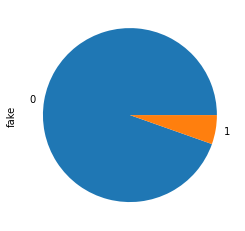

In [28]:
df['fake'].value_counts().plot(kind='pie')

The dataset is higly unbalanced (0: 122858 (0.95); 1: 7022 (0.05)). This should be taken into consideration when performing any supervised classification algorithm.

The other variable in the dataframe, beside the label, is the text of the tweets and header of the article. To understand the content, the most frequent words can be plotted into a wordcloud. Before doing this the variable is tokenized and the stopwords are removed.

In [ ]:
import nltk
nltk.download('stopwords')

# text cleaning
from nltk.corpus import stopwords

additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)

df['processed_text'] = df['content'].apply(lambda x: [i for i in x.split() if not i in swords])

In [ ]:
# wordcloud of the whole dataset
from wordcloud import WordCloud, STOPWORDS

bigstring = df['processed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')

plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

Since there are some very frequent words, which we already know are the main topic of the dataset, we can remove them and re-do the wordcloud.

In [ ]:
# wordcloud without some words
stopwords_1 = ["coronavirus", "covid19","covid",'u'] + list(STOPWORDS)

plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)